<a href="https://colab.research.google.com/github/Jwainlee/Dwita/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
screen = pd.read_csv('충청북도 청주시_그늘막 현황_20230605.csv')

In [ ]:
screen = screen[['시군구', '읍면동', '설치장소', '설치 도로명주소', '설치 지번주소']]

In [ ]:
screen.head()

,시군구,읍면동,설치장소,설치 도로명주소,설치 지번주소
0,청주시상당구,중앙동,포토이즘 앞,상당구 사직대로 371,북문로2가 54-2
1,청주시상당구,중앙동,신한은행 앞,상당구 사직대로 343,NaN
2,청주시상당구,중앙동,한성저축은행 맞은편,상당구 상당로 145,북문로3가 119
3,청주시상당구,중앙동,방아다리 추어탕집 앞,NaN,북문로3가 113
4,청주시상당구,중앙동,상당공원사거리 교통섬,NaN,북문로2가 39-3


In [ ]:
bus_sys = pd.read_csv('충청북도_청주시_버스정보시스템_20211110.csv', encoding = 'cp949')

**컬럼 선택**

In [ ]:
bus_sys['정류장명'] = bus_sys['정류소명']
bus_sys = bus_sys[['정류장명', '위도', '경도']]

In [ ]:
bus_sys.head()

,정류장명,위도,경도
0,ADO(에이디오),36.699732,127.421797
1,CJB컨벤션센터,36.619056,127.469359
2,CJB컨벤션센터,36.618715,127.469152
3,GS메디칼,36.643881,127.330315
4,GS메디칼,36.643960,127.329457


In [ ]:
bus_cj = pd.read_csv('충청북도 청주시_청주시내버스 주요승강장 이용인원_20201224.csv', encoding = 'cp949')

In [ ]:
bus_cj = bus_cj[['정류장명', '승차소계', '하차소계', '총 이용인원']]

In [ ]:
bus_cj.head()

,정류장명,승차소계,하차소계,총 이용인원
0,시외버스터미널,"6,170","2,719","8,890"
1,지하상가,"4,005","1,144","5,148"
2,도청,"2,719","1,971","4,692"
3,서운동,"2,640","1,536","4,178"
4,도청,"2,435","1,319","3,755"


In [ ]:
df = pd.merge(bus_cj, bus_sys, how='left', on='정류장명')

In [ ]:
df.head()

,정류장명,승차소계,하차소계,총 이용인원,위도,경도
0,시외버스터미널,"6,170","2,719","8,890",36.625579,127.431529
1,지하상가,"4,005","1,144","5,148",36.636995,127.488093
2,지하상가,"4,005","1,144","5,148",36.636827,127.488556
3,도청,"2,719","1,971","4,692",36.634176,127.490759
4,도청,"2,719","1,971","4,692",36.634972,127.490451


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   정류장명    87 non-null     object 
 1   승차소계    87 non-null     object 
 2   하차소계    87 non-null     object 
 3   총 이용인원  87 non-null     object 
 4   위도      75 non-null     float64
 5   경도      75 non-null     float64
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


In [ ]:
df[df['경도'].isnull()]

,정류장명,승차소계,하차소계,총 이용인원,위도,경도
23,고속.시외터미널,"1,875","1,310","3,185",NaN,NaN
31,문화산업단지,"1,686",918,"2,605",NaN,NaN
43,문화산업단지,"1,371",530,"1,902",NaN,NaN
54,조치원역,"1,395",357,"1,753",NaN,NaN
60,사직사거리,908,712,"1,620",NaN,NaN
65,사직사거리,"1,028",368,"1,396",NaN,NaN
68,분평주공2단지,"1,254",61,"1,315",NaN,NaN
71,"중앙여고,사창시장","1,000",261,"1,262",NaN,NaN
80,월곡리.충청대학,"1,082",31,"1,113",NaN,NaN
81,오송역,687,418,"1,105",NaN,NaN


In [ ]:
bus_sys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   정류장명    2770 non-null   object 
 1   위도      2770 non-null   float64
 2   경도      2770 non-null   float64
dtypes: float64(2), object(1)
memory usage: 65.1+ KB


In [ ]:
bus_sys[bus_sys['정류장명'].str.contains('터미널')]

,정류장명,위도,경도
184,고속.시외버스터미널,36.626032,127.432177
185,고속버스터미널,36.626537,127.430153
186,고속버스터미널,36.625935,127.429987
388,남부터미널,36.608712,127.479214
1244,서부소방서.터미널시장,36.627537,127.436391
1365,세종고속시외버스터미널,36.469370,127.273946
1366,세종고속시외버스터미널,36.469338,127.273825
1367,세종고속시외버스터미널(지하),36.470816,127.273235
1368,세종고속시외버스터미널(지하),36.470691,127.273138
1372,세종터미널 종료,36.468936,127.273090


In [ ]:
bus_sys.정류장명[bus_sys['정류장명'] == '고속.시외버스터미널'] = '고속.시외터미널'

In [ ]:
bus_sys[bus_sys['정류장명'].str.contains('터미널')]

,정류장명,위도,경도
184,고속.시외터미널,36.626032,127.432177
185,고속버스터미널,36.626537,127.430153
186,고속버스터미널,36.625935,127.429987
388,남부터미널,36.608712,127.479214
1244,서부소방서.터미널시장,36.627537,127.436391
1365,세종고속시외버스터미널,36.469370,127.273946
1366,세종고속시외버스터미널,36.469338,127.273825
1367,세종고속시외버스터미널(지하),36.470816,127.273235
1368,세종고속시외버스터미널(지하),36.470691,127.273138
1372,세종터미널 종료,36.468936,127.273090


In [ ]:
bus_sys[bus_sys['정류장명'].str.contains('문화산업')]

,정류장명,위도,경도
2315,청주문화산업단지입구,36.657559,127.492345
2326,청주시문화산업단지정문,36.657672,127.492253


In [ ]:
bus_sys.정류장명[bus_sys['정류장명'] == '청주문화산업단지입구'] = '문화산업단지'

C:\Users\JaeIn\AppData\Local\Temp\ipykernel_19052\4042163475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_sys.정류장명[bus_sys['정류장명'] == '청주문화산업단지입구'] = '문화산업단지'


In [ ]:
bus_sys[bus_sys['정류장명'].str.contains('조치원역')]

,정류장명,위도,경도
2113,조치원역 승차,36.601040,127.297033
2114,조치원역 하차,36.601303,127.296999


In [ ]:
bus_sys.정류장명[bus_sys['정류장명'] == '조치원역 승차'] = '조치원역'
bus_sys.정류장명[bus_sys['정류장명'] == '조치원역 하차'] = '조치원역'

C:\Users\JaeIn\AppData\Local\Temp\ipykernel_19052\60670297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_sys.정류장명[bus_sys['정류장명'] == '조치원역 승차'] = '조치원역'
C:\Users\JaeIn\AppData\Local\Temp\ipykernel_19052\60670297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_sys.정류장명[bus_sys['정류장명'] == '조치원역 하차'] = '조치원역'


In [ ]:
bus_sys[bus_sys['정류장명'].str.contains('사직사거리')]

,정류장명,위도,경도
1102,사직사거리.시립미술관,36.635937,127.477944
1103,사직사거리.시립미술관,36.635730,127.478111


In [ ]:
bus_sys.정류장명[bus_sys['정류장명'] == '사직사거리.시립미술관'] = '사직사거리'

C:\Users\JaeIn\AppData\Local\Temp\ipykernel_19052\2928527080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_sys.정류장명[bus_sys['정류장명'] == '사직사거리.시립미술관'] = '사직사거리'


In [ ]:
bus_sys[bus_sys['정류장명'].str.contains('분평휴먼시아')]

,정류장명,위도,경도
1043,분평휴먼시아2단지아파트,36.611280,127.492587
1044,분평휴먼시아5단지아파트,36.608011,127.497094
1045,분평휴먼시아5단지아파트,36.608031,127.496859
1046,분평휴먼시아6단지,36.606060,127.491692
1047,분평휴먼시아6단지아파트,36.607356,127.489729
1048,분평휴먼시아6단지아파트,36.606302,127.492708
1049,분평휴먼시아7단지아파트,36.607304,127.489495


In [ ]:
bus_sys.정류장명[bus_sys['정류장명'] == '분평휴먼시아2단지아파트'] = '분평주공2단지'

C:\Users\JaeIn\AppData\Local\Temp\ipykernel_19052\2666885183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_sys.정류장명[bus_sys['정류장명'] == '분평휴먼시아2단지아파트'] = '분평주공2단지'


In [ ]:
bus_sys[bus_sys['정류장명'].str.contains('중앙여고')]

,정류장명,위도,경도
2157,중앙여고.사창시장,36.635012,127.463598
2158,중앙여고.사창시장,36.635260,127.464154


In [ ]:
bus_sys.정류장명[bus_sys['정류장명'] == '중앙여고.사창시장'] = '중앙여고,사창시장'

C:\Users\JaeIn\AppData\Local\Temp\ipykernel_19052\2623375807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_sys.정류장명[bus_sys['정류장명'] == '중앙여고.사창시장'] = '중앙여고,사창시장'


In [ ]:
bus_sys[bus_sys['정류장명'].str.contains('월곡리')]

,정류장명,위도,경도
1909,월곡리,36.623647,127.374093
1910,월곡리.충청대학교,36.624113,127.369895


In [ ]:
bus_sys.정류장명[bus_sys['정류장명'] == '월곡리.충청대학교'] = '월곡리.충청대학'

C:\Users\JaeIn\AppData\Local\Temp\ipykernel_19052\971253833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_sys.정류장명[bus_sys['정류장명'] == '월곡리.충청대학교'] = '월곡리.충청대학'


In [ ]:
bus_sys[bus_sys['정류장명'].str.contains('오송역')]

,정류장명,위도,경도
1691,오송역 동아라이크텐아파트,36.617231,127.309018
1692,오송역 동아라이크텐아파트,36.616860,127.309659
1693,오송역3.4,36.619296,127.327214
1694,오송역5,36.619384,127.327100
1695,오송역6,36.619461,127.326997
1696,오송역7,36.619535,127.326916
1697,오송역8,36.619608,127.326838
1698,오송역북문,36.623908,127.326077
1699,오송역북문,36.623611,127.325941
1700,오송역북문,36.623648,127.324804


In [ ]:
bus_sys.정류장명[bus_sys['정류장명'] == '오송역종점'] = '오송역'

C:\Users\JaeIn\AppData\Local\Temp\ipykernel_19052\3487964545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_sys.정류장명[bus_sys['정류장명'] == '오송역종점'] = '오송역'


In [ ]:
bus_sys[bus_sys['정류장명'].str.contains('분평')]

,정류장명,위도,경도
1036,분평1단지뜨란채아파트,36.611104,127.487476
1037,분평대원아파트,36.609951,127.489848
1038,분평대원아파트,36.609953,127.489614
1039,분평아파트단지종점 승차,36.613706,127.492358
1040,분평아파트단지종점 하차,36.614341,127.494226
1041,분평우체국,36.611224,127.493213
1042,분평현대대우아파트,36.610909,127.487993
1043,분평주공2단지,36.611280,127.492587
1044,분평휴먼시아5단지아파트,36.608011,127.497094
1045,분평휴먼시아5단지아파트,36.608031,127.496859


In [ ]:
bus_sys.정류장명[bus_sys['정류장명'] == '분평1단지뜨란채아파트'] = '분평뜨란채1단지'

C:\Users\JaeIn\AppData\Local\Temp\ipykernel_19052\3652905783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_sys.정류장명[bus_sys['정류장명'] == '분평1단지뜨란채아파트'] = '분평뜨란채1단지'


In [ ]:
df_2 = pd.merge(bus_cj, bus_sys, how='left', on='정류장명')

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   정류장명    92 non-null     object 
 1   승차소계    92 non-null     object 
 2   하차소계    92 non-null     object 
 3   총 이용인원  92 non-null     object 
 4   위도      92 non-null     float64
 5   경도      92 non-null     float64
dtypes: float64(2), object(4)
memory usage: 5.0+ KB


In [ ]:
df_2.head()

,정류장명,승차소계,하차소계,총 이용인원,위도,경도
0,시외버스터미널,"6,170","2,719","8,890",36.625579,127.431529
1,지하상가,"4,005","1,144","5,148",36.636995,127.488093
2,지하상가,"4,005","1,144","5,148",36.636827,127.488556
3,도청,"2,719","1,971","4,692",36.634176,127.490759
4,도청,"2,719","1,971","4,692",36.634972,127.490451


In [ ]:
screen.head()

,시군구,읍면동,설치장소,설치 도로명주소,설치 지번주소
0,청주시상당구,중앙동,포토이즘 앞,상당구 사직대로 371,북문로2가 54-2
1,청주시상당구,중앙동,신한은행 앞,상당구 사직대로 343,NaN
2,청주시상당구,중앙동,한성저축은행 맞은편,상당구 상당로 145,북문로3가 119
3,청주시상당구,중앙동,방아다리 추어탕집 앞,NaN,북문로3가 113
4,청주시상당구,중앙동,상당공원사거리 교통섬,NaN,북문로2가 39-3


In [ ]:
!pip install folium

In [ ]:
!pip install geopy

In [ ]:
import folium
from geopy.geocoders import Nominatim

In [ ]:
screen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구       316 non-null    object
 1   읍면동       316 non-null    object
 2   설치장소      316 non-null    object
 3   설치 도로명주소  112 non-null    object
 4   설치 지번주소   304 non-null    object
dtypes: object(5)
memory usage: 12.5+ KB


In [ ]:
ad1 = screen[screen['설치 도로명주소'].notnull()]['설치 도로명주소']

In [ ]:
ad2 = screen[screen['설치 지번주소'].notnull()]['설치 지번주소']

In [ ]:
ad1.info()

<class 'pandas.core.series.Series'>
Int64Index: 112 entries, 0 to 313
Series name: 설치 도로명주소
Non-Null Count  Dtype 
--------------  ----- 
112 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


In [ ]:
ad2.info()

<class 'pandas.core.series.Series'>
Int64Index: 304 entries, 0 to 315
Series name: 설치 지번주소
Non-Null Count  Dtype 
--------------  ----- 
304 non-null    object
dtypes: object(1)
memory usage: 4.8+ KB


In [ ]:
ad = screen[['설치 도로명주소', '설치 지번주소']]

In [ ]:
ad[np.logical_and(ad['설치 도로명주소'].isna(), ad['설치 지번주소'].isna())].sum()

설치 도로명주소    0.0
설치 지번주소     0.0
dtype: float64

In [ ]:
j_idx = ad[ad['설치 도로명주소'].isna() == True].index

In [ ]:
j_idx = list(j_idx)

In [ ]:
3 in j_idx

True

In [ ]:
screen['주소'] = 0

for i in range(len(screen)):
    if i in j_idx:
        screen['주소'][i] = '청주시 ' + screen['설치 지번주소'][i]
    else:
        screen['주소'][i] = screen['설치 도로명주소'][i]

C:\Users\JaeIn\AppData\Local\Temp\ipykernel_19052\471523196.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screen['주소'][i] = screen['설치 도로명주소'][i]


In [ ]:
screen.head(10)

,시군구,읍면동,설치장소,설치 도로명주소,설치 지번주소,주소
0,청주시상당구,중앙동,포토이즘 앞,상당구 사직대로 371,북문로2가 54-2,상당구 사직대로 371
1,청주시상당구,중앙동,신한은행 앞,상당구 사직대로 343,NaN,상당구 사직대로 343
2,청주시상당구,중앙동,한성저축은행 맞은편,상당구 상당로 145,북문로3가 119,상당구 상당로 145
3,청주시상당구,중앙동,방아다리 추어탕집 앞,NaN,북문로3가 113,청주시 북문로3가 113
4,청주시상당구,중앙동,상당공원사거리 교통섬,NaN,북문로2가 39-3,청주시 북문로2가 39-3
5,청주시상당구,성안동,성안길 에잇세컨즈 앞,NaN,북문로1가 106,청주시 북문로1가 106
6,청주시상당구,성안동,구남궁병원사거리 대원칸타빌 앞,상당구 남사로 137,NaN,상당구 남사로 137
7,청주시상당구,성안동,충북도청사거리 도민홍보관 앞,NaN,문화동 89-3,청주시 문화동 89-3
8,청주시상당구,성안동,구법원사거리 맞은편 공원쪽,상당구 용담로14-3,문화동 52,상당구 용담로14-3
9,청주시상당구,성안동,석교육거리 유정훈치과 앞 교통섬,상당구 상당로1번길 2,석교동 126-118,상당구 상당로1번길 2


In [ ]:
screen.주소.isna().sum()

0

In [ ]:
addr = screen['주소']

In [ ]:
addr.info()

<class 'pandas.core.series.Series'>
RangeIndex: 316 entries, 0 to 315
Series name: 주소
Non-Null Count  Dtype 
--------------  ----- 
316 non-null    object
dtypes: object(1)
memory usage: 2.6+ KB


In [ ]:
addr[0:3]

0    상당구 사직대로 371
1    상당구 사직대로 343
2     상당구 상당로 145
Name: 주소, dtype: object

In [ ]:
ad1[0:3]

0    상당구 사직대로 371
1    상당구 사직대로 343
2     상당구 상당로 145
Name: 설치 도로명주소, dtype: object

In [ ]:
df_2.위도.unique()

array([36.62557898, 36.63699526, 36.63682718, 36.63417647, 36.63497179,
       36.63155959, 36.63867605, 36.63827951, 36.65074073, 36.65085033,
       36.63361262, 36.63594787, 36.63574149, 36.63486487, 36.63496662,
       36.63556306, 36.63533062, 36.62971752, 36.62769498, 36.62603173,
       36.63288973, 36.63674923, 36.63665262, 36.65755922, 36.627554  ,
       36.63453715, 36.63443041, 36.63474553, 36.63458638, 36.62669942,
       36.62746916, 36.63433755, 36.63411569, 36.61717969, 36.60104049,
       36.6013025 , 36.64163614, 36.64174424, 36.63363092, 36.63593697,
       36.63572991, 36.62653722, 36.6259352 , 36.61127963, 36.64737816,
       36.64809781, 36.63501244, 36.63525963, 36.67047046, 36.6710134 ,
       36.61337726, 36.66756694, 36.64147702, 36.64152733, 36.61048324,
       36.6102633 , 36.62411294, 36.61918733, 36.61110355, 36.6352951 ,
       36.63548934])

In [ ]:
bus_coor = list(zip(df_2['위도'], df_2['경도']))

In [ ]:
coordinates

(36.6761832, 127.5027216)

In [ ]:
bus_coor[1]

(36.63699526, 127.4880927)


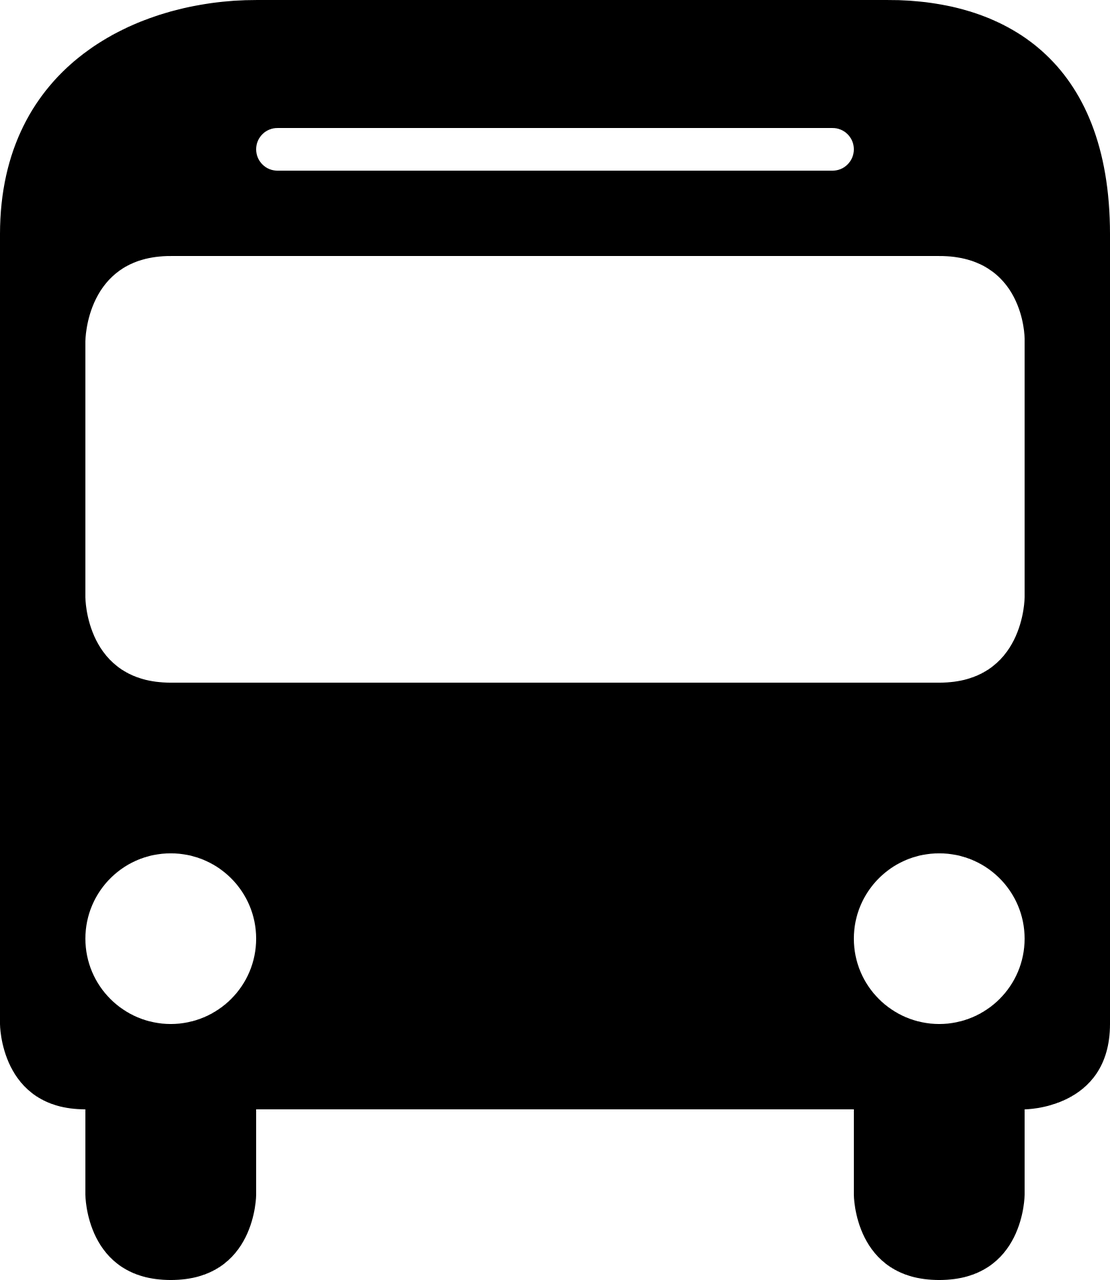

In [ ]:
map_center = [36.6363, 127.4902]  # 서울시청을 중심으로 지도 생성
zoom_level = 12
map_o = folium.Map(location=map_center, zoom_start=zoom_level)

# 주소 리스트를 순회하며 좌표를 가져와서 지도에 마커로 표시
icon_bus = folium.CustomIcon(icon_image = 'bus-g47e233d00_1280.png', icon_size = (15, 15))

folium.Marker(bus_coor[0], popup=address[0],
                      icon = icon_bus
                     ).add_to(map_o)

map_o


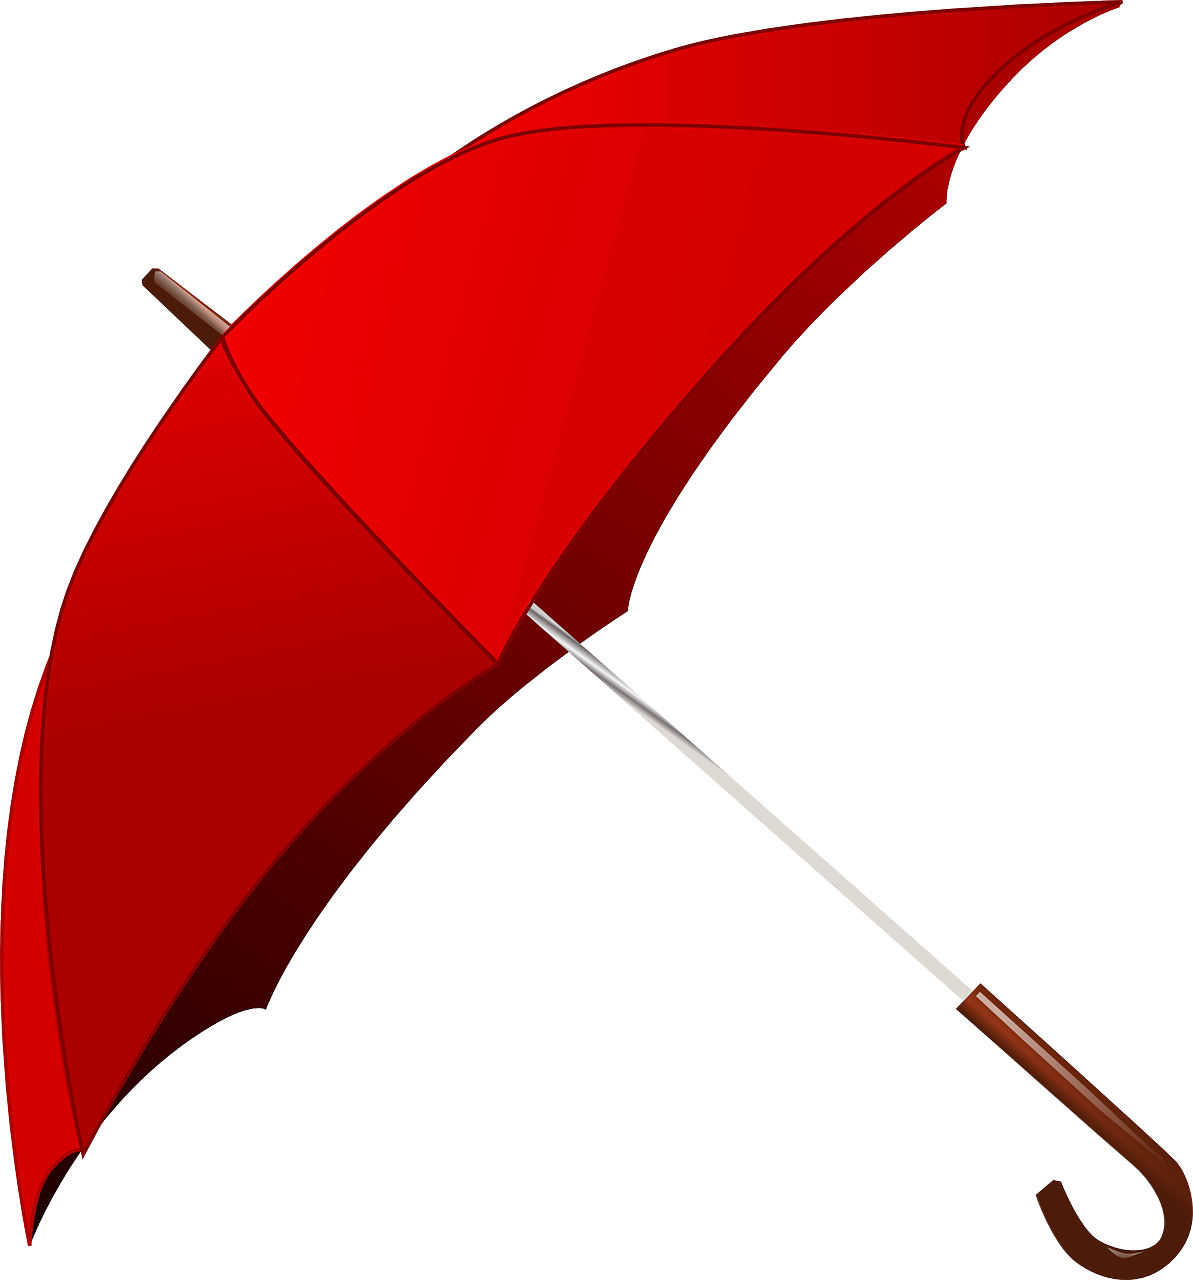
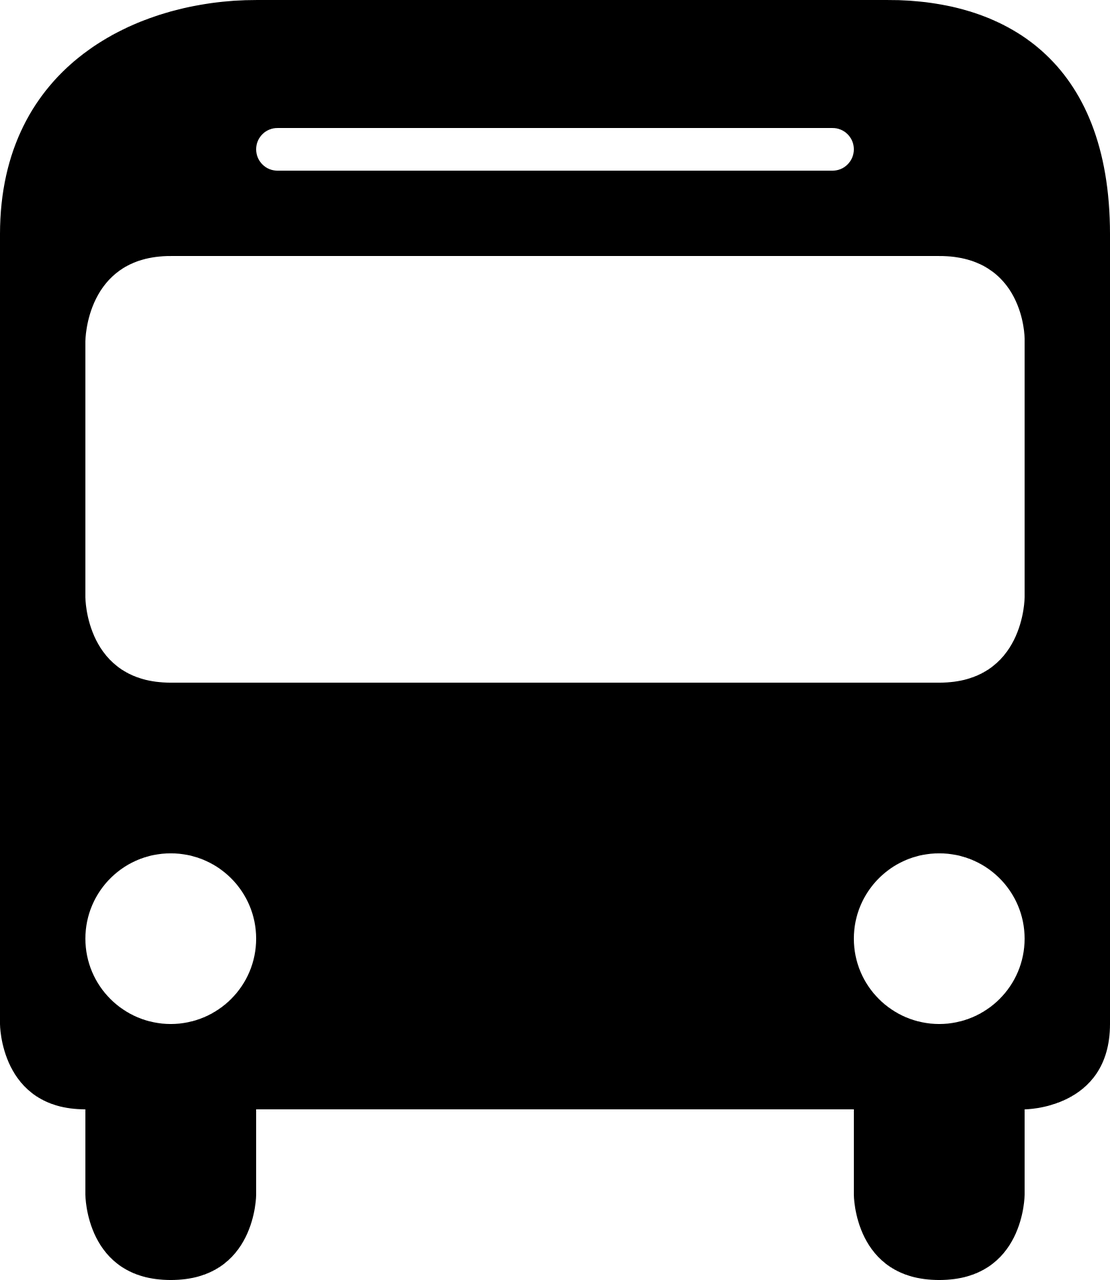

In [ ]:
# 도로명주소를 좌표로 변환하는 함수
def get_coordinates(address):
    geolocator = Nominatim(user_agent="address_converter")
    location = geolocator.geocode(address)
    if location is None:
        return None
    return location.latitude, location.longitude

# 도로명주소 리스트 (예시)
addresses = addr

# 지도 생성
map_center = [36.6363, 127.4902]  # 서울시청을 중심으로 지도 생성
zoom_level = 12
map_osm = folium.Map(location=map_center, zoom_start=zoom_level)

# 주소 리스트를 순회하며 좌표를 가져와서 지도에 마커로 표시
icon_screen = folium.CustomIcon(icon_image = 'umbrella-ga386978f4_1280.png', icon_size = (15, 15))
icon_bus = folium.CustomIcon(icon_image = 'bus-g47e233d00_1280.png', icon_size = (15, 15))

for address in addresses:
    coordinates = get_coordinates(address)
    if coordinates:
        folium.Marker(coordinates, popup=address,
                      icon = icon_screen
                     ).add_to(map_osm)

for i in range(len(bus_coor)):
    coordinates = bus_coor[i]
    if coordinates:
        folium.Marker(coordinates,
                      icon = icon_bus
                     ).add_to(map_osm)


# 지도를 HTML 파일로 저장하거나, Jupyter Notebook에서 바로 표시
map_osm.save("address_map.html")
map_osm


In [ ]:
# 주소를 좌표로 변환하는 함수
def get_coordinates(address):
    geolocator = Nominatim(user_agent="address_converter")
    location = geolocator.geocode(address)
    if location is None:
        return None
    return location.latitude, location.longitude

# 주소 리스트
addresses = addr

# 지도 생성
map_center = [36.6363, 127.4902]  # 청주시청을 중심으로 지도 생성
zoom_level = 13
map_osm = folium.Map(location=map_center, zoom_start=zoom_level)

# 지도에 마커로 표시
for address in addresses:
    coordinates = get_coordinates(address)
    if coordinates:
        folium.CircleMarker(coordinates, radius=5,
                            color='transparent',
                            fill=True,
                            fill_color='red',
                            fill_opacity=0.5,
                     ).add_to(map_osm)

for i in range(len(bus_coor)):
    coordinates = bus_coor[i]
    if coordinates:
        folium.CircleMarker(coordinates, radius=5,
                            color='transparent',
                            fill=True,
                            fill_color='blue',
                            fill_opacity=0.5,
                     ).add_to(map_osm)


map_osm.save("address_map.html")
map_osm